## **Name: Shruti Patil**

## **Roll No: 22102B2005**

## **BE CMPN B**

## **GitHub Link: https://github.com/shruti10951/Machine-Learning**

## **Problem Statement 7**

In [4]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize


In [5]:
# Define the URL for the Facebook dataset
facebook_url = 'https://snap.stanford.edu/data/facebook_combined.txt.gz'

# Download and load the dataset
import gzip
import requests
from io import BytesIO

response = requests.get(facebook_url)
compressed_file = BytesIO(response.content)
with gzip.open(compressed_file, 'rt') as f:
    edges = [line.strip().split() for line in f.readlines()]

# Create a NetworkX graph
G_facebook = nx.Graph()
G_facebook.add_edges_from(edges)
print(f"Number of nodes: {G_facebook.number_of_nodes()}")
print(f"Number of edges: {G_facebook.number_of_edges()}")


Number of nodes: 4039
Number of edges: 88234


In [6]:
# Get the adjacency matrix
A_facebook = nx.to_numpy_array(G_facebook)
print(f"Adjacency matrix shape: {A_facebook.shape}")


Adjacency matrix shape: (4039, 4039)


In [7]:
# Mocking a small Enron email dataset
# Sample data: list of tuples (sender, receiver)
enron_emails = [
    ('user1@enron.com', 'user2@enron.com'),
    ('user2@enron.com', 'user3@enron.com'),
    ('user3@enron.com', 'user4@enron.com'),
    ('user4@enron.com', 'user1@enron.com'),
    ('user1@enron.com', 'user3@enron.com'),
    ('user2@enron.com', 'user4@enron.com'),
]

# Create a DataFrame
df_enron = pd.DataFrame(enron_emails, columns=['sender', 'receiver'])
print(df_enron.head())


            sender         receiver
0  user1@enron.com  user2@enron.com
1  user2@enron.com  user3@enron.com
2  user3@enron.com  user4@enron.com
3  user4@enron.com  user1@enron.com
4  user1@enron.com  user3@enron.com


In [8]:
# Create a user list
users = list(set(df_enron['sender']).union(set(df_enron['receiver'])))
user_indices = {user: idx for idx, user in enumerate(users)}

# Initialize adjacency matrix
A_enron = np.zeros((len(users), len(users)))

# Populate adjacency matrix based on email counts
for _, row in df_enron.iterrows():
    sender = row['sender']
    receiver = row['receiver']
    A_enron[user_indices[sender], user_indices[receiver]] += 1
    A_enron[user_indices[receiver], user_indices[sender]] += 1  # Assuming undirected graph

print(f"Enron adjacency matrix shape: {A_enron.shape}")


Enron adjacency matrix shape: (4, 4)


In [9]:
# Define the number of clusters
n_clusters_facebook = 5  # You can experiment with different numbers

# Initialize Spectral Clustering
spectral_facebook = SpectralClustering(
    n_clusters=n_clusters_facebook,
    affinity='precomputed',
    assign_labels='kmeans',
    random_state=42
)

# Fit the model and predict cluster labels
labels_facebook = spectral_facebook.fit_predict(A_facebook)
print(f"Cluster labels for Facebook dataset: {labels_facebook}")


Cluster labels for Facebook dataset: [3 3 3 ... 4 4 4]


In [10]:
# Define the number of clusters
n_clusters_enron = 3  # Adjust based on data

# Initialize Spectral Clustering
spectral_enron = SpectralClustering(
    n_clusters=n_clusters_enron,
    affinity='precomputed',
    assign_labels='kmeans',
    random_state=42
)

# Fit the model and predict cluster labels
labels_enron = spectral_enron.fit_predict(A_enron)
print(f"Cluster labels for Enron dataset: {labels_enron}")


Cluster labels for Enron dataset: [0 1 1 2]


In [11]:
# Silhouette Score requires feature vectors, but we have a similarity matrix
# One workaround is to use the normalized Laplacian or eigenvectors
# Alternatively, use adjacency matrix as features

# Normalize the adjacency matrix
A_facebook_normalized = normalize(A_facebook, norm='l1', axis=1)

# Compute Silhouette Score
silhouette_facebook = silhouette_score(A_facebook_normalized, labels_facebook, metric='cosine')
print(f"Silhouette Score for Facebook Dataset: {silhouette_facebook}")


Silhouette Score for Facebook Dataset: 0.07376920305751174


In [12]:
# Normalize the adjacency matrix
A_enron_normalized = normalize(A_enron, norm='l1', axis=1)

# Compute Silhouette Score
silhouette_enron = silhouette_score(A_enron_normalized, labels_enron, metric='cosine')
print(f"Silhouette Score for Enron Dataset: {silhouette_enron}")


Silhouette Score for Enron Dataset: 0.0


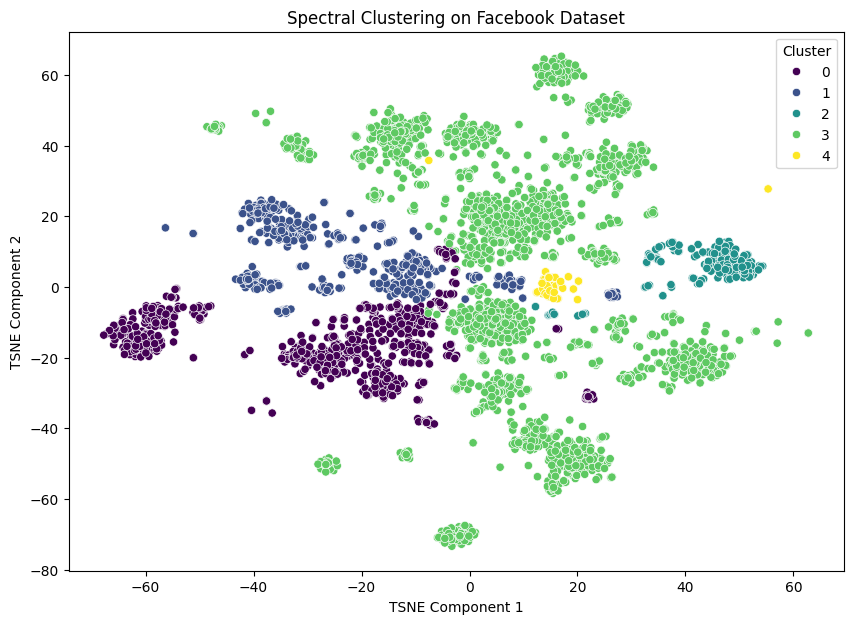

In [13]:
# Use the first two eigenvectors for visualization
from sklearn.manifold import TSNE

# Apply TSNE for dimensionality reduction
tsne_facebook = TSNE(n_components=2, random_state=42)
A_facebook_tsne = tsne_facebook.fit_transform(A_facebook_normalized)

# Plot the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x=A_facebook_tsne[:,0], y=A_facebook_tsne[:,1], hue=labels_facebook, palette='viridis')
plt.title('Spectral Clustering on Facebook Dataset')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.show()


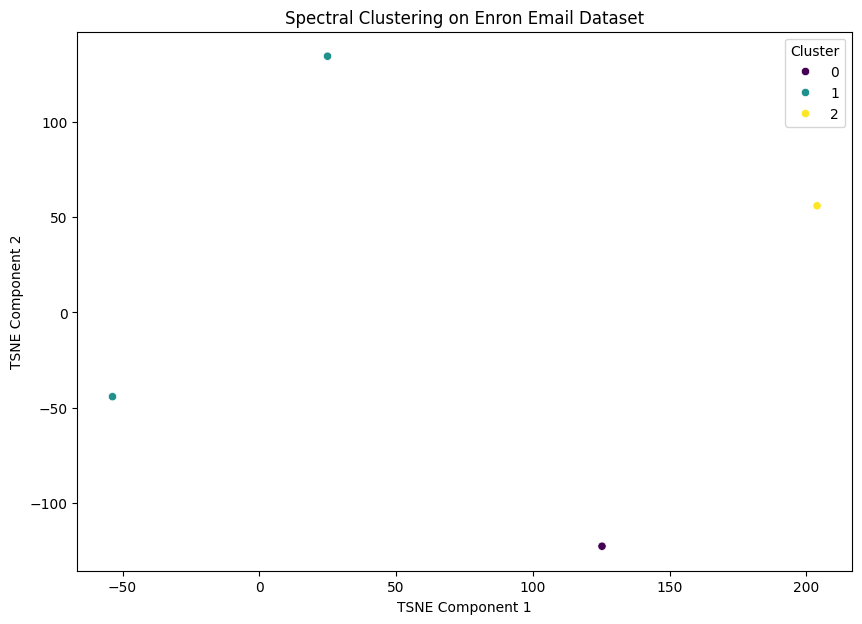

In [16]:
from sklearn.manifold import TSNE

# Ensure the number of samples is greater than the perplexity value
tsne_enron = TSNE(n_components=2, random_state=42, perplexity=min(5, A_enron_normalized.shape[0] - 1))

# Apply TSNE for dimensionality reduction
A_enron_tsne = tsne_enron.fit_transform(A_enron_normalized)

# Plot the clusters
plt.figure(figsize=(10,7))
sns.scatterplot(x=A_enron_tsne[:,0], y=A_enron_tsne[:,1], hue=labels_enron, palette='viridis')
plt.title('Spectral Clustering on Enron Email Dataset')
plt.xlabel('TSNE Component 1')
plt.ylabel('TSNE Component 2')
plt.legend(title='Cluster')
plt.show()
